# Mesh2d refinement based on gridded samples

This is a brief introduction to the process of mesh refinement using gridded samples. When refining the mesh using gridded samples, bilinear interpolation is used to calculate the depth values at the mesh nodes.

At the very beginning, the necessary libraries have to be imported.

In [18]:
import matplotlib.pyplot as plt
import numpy as np

from meshkernel import GeometryList, GriddedSamples, MakeGridParameters, MeshKernel, MeshRefinementParameters, RefinementType

`meshkernel` provides a set of convenience methods for creating common meshes.

We use the `curvilinear_make_uniform` method to create a simple curvilinear grid.
You can look at the documentation in order to find all its parameters.

In [19]:
mk = MeshKernel()

make_grid_parameters = MakeGridParameters()
make_grid_parameters.num_columns = 5
make_grid_parameters.num_rows = 6
make_grid_parameters.angle = 0.0
make_grid_parameters.block_size = 100.0
make_grid_parameters.origin_x = 0.0
make_grid_parameters.origin_y = 0.0
make_grid_parameters.block_size_x = 100.0
make_grid_parameters.block_size_y = 100.0

node_x = np.empty(0, dtype=np.double)
node_y = np.empty(0, dtype=np.double)
geometry_list = GeometryList(node_x, node_y)
    
mk.curvilinear_make_uniform(make_grid_parameters, geometry_list)

We convert the curvilinear grid to an unstructured mesh and get the resulting mesh2d

In [20]:
mk.curvilinear_convert_to_mesh2d()
mesh2d_input = mk.mesh2d_get()

The generated mesh can be visualized as follow

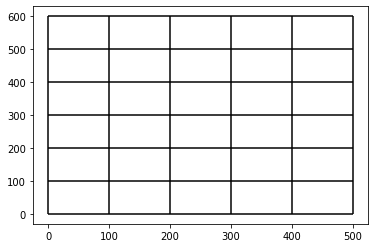

In [21]:
fig, ax = plt.subplots()
mesh2d_input.plot_edges(ax, color="black")

Now we define the gridded samples with uniform spacing

In [22]:
gridded_samples = GriddedSamples(
    n_cols=8,
    n_rows=7,
    x_origin=-50.0,
    y_origin=-50.0,
    origin_location_type=0,
    cell_size=100.0,
    values=np.array([-0.05] * 72, dtype=np.double))

And the parameters for the mesh refinement algorithm

In [23]:
refinement_params = MeshRefinementParameters(
    refine_intersected=False,
    use_mass_center_when_refining=False,
    min_face_size=2.0,
    refinement_type=RefinementType.WAVE_COURANT,
    connect_hanging_nodes=True,
    account_for_samples_outside_face=False,
    max_refinement_iterations=5)

Refinement can now be performed

In [24]:
mk.mesh2d_refine_based_on_gridded_samples(gridded_samples, refinement_params, True)

We can now visualize the refined grid

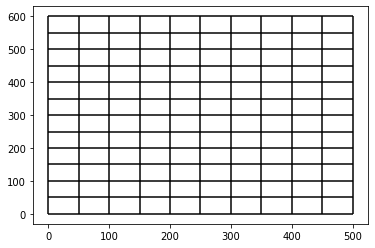

In [25]:
mesh2d_output = mk.mesh2d_get()
fig, ax = plt.subplots()
mesh2d_output.plot_edges(ax, color="black")

If gridding is not uniform, we can use 